# Stimulus Generation: Face Scrambling

Simply generate/overlay one mask per movement frame. Create an alpha blend between mask and image, increase opacity gradually.

points:
- triangle should always be centered relative to the whole frame
- should not appear linearly, but stay vaguely visible for a longer period of time

In [1]:
%load_ext jupyter_cms
%load_ext ipyext.writeandexecute

'writeandexecute' magic loaded.


In [3]:
# <api>
import os
import sys

import numpy as np
from matplotlib import pyplot as plt

import cv2
from skimage import io
from sklearn.feature_extraction import image
from skimage.util.shape import view_as_blocks
import itertools

import mywb.face_detection as fd
import mywb.face_scrambling as fs

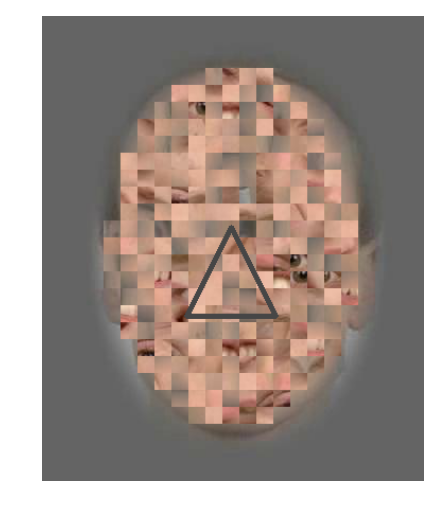

In [4]:
in_dir = './all_frames_scrambled/frames_ekl99m03/'
out_dir = './all_frames_scrambled_triangled/frames_ekl99m03'
movement_frames = range(2,6) # 1-based indices!!
apex_frames = range(6,19)
opac_levels = [0.1, 0.2, 0.4, 0.8]

frames = os.listdir(in_dir)
def _get_frameno(filen):
    frameno = filen.split('_')[-1].split('.')[0] # this is ugly!!
    return int(frameno)

def _triangle_from_center(center, size=60, y_offset=10, down=False):
    center = [int(x) for x in center]
    center[0] += y_offset
    if not down:
        lower_left = (center[1]-size, center[0])
        lower_right = (center[1]+size, center[0])
        top = (center[1], center[0]-size*2)
    else:
        center[0] += size/2
        lower_left = (center[1]-size, center[0]-size*2)
        lower_right = (center[1]+size, center[0]-size*2)
        top = (center[1], center[0])
        
    return [lower_left, lower_right, top]

def choose_triangle(filen, down_emo="ekl"):
    bn = os.path.basename(filen)
    idx = bn.split('_')[0]
    expression = idx[0:3]
    if expression==down_emo:
        down=True
    else:
        down=False
    return down

frame_nos = [_get_frameno(x) for x in frames]
expression = frames[0][0:3]

test_frame = frames[17]
test_img = os.path.join(in_dir, test_frame)
im = io.imread(test_img)

def draw_triangle(img, opacity=.5, trgl_size=42, y_offset=8, trgl_color=(70,70,70), trgl_thickness=4, down_emo="ekl", plot=False):
    im = io.imread(img)
    down = choose_triangle(img, down_emo)
    center = (im.shape[0]/2, im.shape[1]/2)
    trgl_pts = _triangle_from_center(center, trgl_size, down=down)
    overlay = im.copy()
    cv2.polylines(overlay, np.int32([trgl_pts]), True, trgl_color, thickness=trgl_thickness)
    cv2.addWeighted(overlay, opacity, im, 1 - opacity, 0, im)
    if plot:
        fd.simple_implot(im)
    return im

im = draw_triangle(test_img, down_emo='fre', opacity=1)
fd.simple_implot(im)

In [5]:
def draw_triangles(source_dir, target_dir, opac_levels=np.logspace(np.log10(0.1), np.log10(0.56), 4), down_emo="ekl"):
    movement_frames = range(2,6) # 1-based indices!!
    apex_frames = range(6,19)
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)
    frames = os.listdir(source_dir)
    i = 0
    for frame in frames:
        source_img = os.path.join(source_dir, frame)
        target_img = os.path.join(target_dir, frame)
        frame_no = _get_frameno(frame)
        if frame_no in range(2,6):
            im = draw_triangle(source_img, opacity=opac_levels[i], down_emo=down_emo)
            i += 1
        elif frame_no > 5:
            im = draw_triangle(source_img, opacity=1, down_emo=down_emo)
        else:
            im = io.imread(source_img)
        io.imsave(target_img, im)
        
in_dir = './all_frames_scrambled/frames_ekl99m03/'
out_dir = './all_frames_scrambled_triangled/frames_ekl99m03'
opac_levels=[0.1, 0.2, 0.4, 0.8]
draw_triangles(in_dir, out_dir, opac_levels=opac_levels, down_emo="ekl")


In [6]:
frame_dir = './all_frames_scrambled/'
frame_scrambled_dir = './all_frames_scrambled_triangled/'
stimuli = os.listdir(frame_dir)

for stim in stimuli:
    print "triangling", stim
    source_dir = os.path.join(frame_dir, stim)
    target_dir = os.path.join(frame_scrambled_dir, stim)
    draw_triangles(source_dir, target_dir, opac_levels=opac_levels, down_emo="fre")

triangling frames_ekl99m03
triangling frames_ekl99m05
triangling frames_ekl99m07
triangling frames_ekl99m09
triangling frames_ekl99m10
triangling frames_ekl99m15
triangling frames_ekl99m20
triangling frames_ekl99m21
triangling frames_ekl99m23
triangling frames_ekl99m24
triangling frames_ekl99m25
triangling frames_ekl99m28
triangling frames_ekl99m30
triangling frames_ekl99m33
triangling frames_ekl99m36
triangling frames_ekl99m38
triangling frames_ekl99m46
triangling frames_ekl99m47
triangling frames_ekl99m49
triangling frames_ekl99m71
triangling frames_ekl99w01
triangling frames_ekl99w02
triangling frames_ekl99w04
triangling frames_ekl99w08
triangling frames_ekl99w12
triangling frames_ekl99w14
triangling frames_ekl99w16
triangling frames_ekl99w18
triangling frames_ekl99w19
triangling frames_ekl99w22
triangling frames_ekl99w26
triangling frames_ekl99w27
triangling frames_ekl99w31
triangling frames_ekl99w32
triangling frames_ekl99w37
triangling frames_ekl99w56
triangling frames_ekl99w57
t